In [147]:
import datetime as dt

import pandas as pd
import matplotlib.pyplot as plt

In [148]:
mjo_df = pd.read_pickle('mjo.pickle.xz')

In [149]:
deg_day_df = pd.read_pickle('deg_days5.pickle.xz')

In [150]:
first_day = pd.Timestamp('1981-1-1')
#first_day = pd.Timestamp('2018-11-1')
last_day = pd.Timestamp('2018-12-31')
#last_day = pd.Timestamp('2018-11-30')

In [151]:
rmm1_vals = []
rmm2_vals = []
hdd_vals = []
for day in pd.date_range(first_day, last_day):
    # day is day forecast is made.
    # MJO is available from two days prior.
    # Forecast is for 16-20 day period, so 17 days after today is center.
    mjo_day = day - pd.DateOffset(days=2)
    dd_day = day + pd.DateOffset(days=17)
    rmm1_vals.append(mjo_df['RMM1'][mjo_day])
    rmm2_vals.append(mjo_df['RMM2'][mjo_day])
    hdd_vals.append(deg_day_df['hdd_anom'][dd_day])

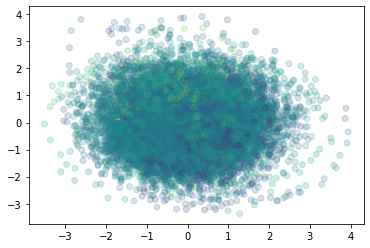

In [152]:
plt.scatter(rmm1_vals, rmm2_vals, c=hdd_vals, alpha=0.2)

In [153]:
df = mjo_df.join(deg_day_df, how='inner')

In [154]:
mjo_mask = df.columns.isin(['RMM1', 'RMM2'])
dd_mask = df.columns.isin(['cdd_anom', 'hdd_anom'])

# MJO is available two days prior
cols_to_shift = df.columns[mjo_mask]
df[cols_to_shift] = df[cols_to_shift].shift(2)

# Forecast is for 16-20 day period, so 17 days after today is center.
cols_to_shift = df.columns[dd_mask]
df[cols_to_shift] = df[cols_to_shift].shift(-17)

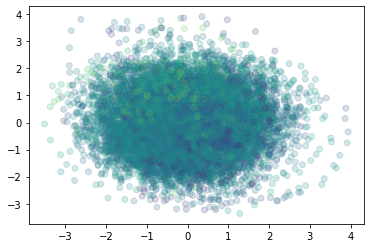

In [155]:
plt.scatter(df['RMM1'], df['RMM2'], c=df['hdd_anom'], alpha=0.2)

In [156]:
today = pd.Timestamp('2019-6-15')

In [157]:
first_year = 1981
last_year = 2018

In [158]:
tdelt = pd.to_timedelta(45, 'D')

In [159]:
periods = []
for y in range(first_year, last_year+1):
    try:
        mid = pd.Timestamp(year = y, month = today.month, day = today.day)
    except ValueError:  # Leap day!
        mid = pd.Timestamp(year = y, month = 3, day = 1)
    prd = pd.period_range(mid - tdelt, mid + tdelt)
    for p in prd:
        periods.append(p.to_timestamp())


In [160]:
periods = pd.to_datetime(periods)

In [161]:
candidates = df.loc[periods]

In [162]:
import numpy as np

In [163]:
cur_rmm1 = -1.2411472
cur_rmm2 = -0.88222831
criteria = np.sqrt((candidates['RMM1'] - cur_rmm1)**2 + (candidates['RMM2'] - cur_rmm2)**2) < .5
analogs = candidates[criteria]

In [164]:
analogs

,RMM1,RMM2,cdd_anom,hdd_anom
1981-05-05,-1.670550,-0.833190,-7.86,-1.890000e+00
1981-05-08,-1.283960,-1.329410,1.18,-1.026000e+01
1982-05-25,-1.488000,-0.575950,-10.44,3.740000e+00
1982-05-26,-1.617950,-1.068880,-12.27,4.470000e+00
1985-07-20,-1.451590,-0.453510,-7.28,7.000000e-02
1985-07-21,-1.579730,-0.628980,-4.51,2.500000e-01
1985-07-22,-1.586300,-0.673090,-3.31,6.400000e-01
1985-07-23,-1.217100,-0.586350,-3.29,9.300000e-01
1986-06-03,-1.438540,-0.530670,-3.49,5.400000e-01
1986-06-04,-1.054580,-0.729700,0.29,-7.900000e-01


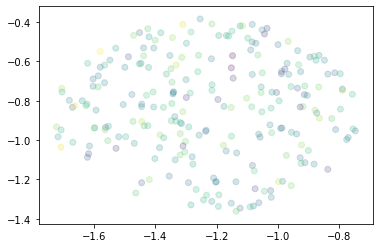

In [165]:
plt.scatter(analogs['RMM1'], analogs['RMM2'], c=analogs['cdd_anom'], alpha=0.2)

In [166]:
analogs['cdd_anom'].describe()

count    232.000000
mean       1.648578
std        7.718348
min      -19.890000
25%       -3.337500
50%        1.300000
75%        7.210000
max       19.650000
Name: cdd_anom, dtype: float64